In [ ]:
from plotting import group_data_by_transect, plot_transect_subplots
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load in all depth vs resistance curves into a dataframe list

In [67]:
def load_data(data_src):
    depth_resist_curve_df_list = [] # used for plotting
    filename_list = []
    for filename in os.listdir(data_src):
        df = pd.read_csv(f"{data_src}/{filename}")
        depth_resist_curve_df_list.append(df)
        filename_list.append(filename)
    return depth_resist_curve_df_list, filename_list

data_src = "data/cleaned_data"
depth_resist_curve_df_list, filename_list = load_data(data_src)
filename_to_depth_resist = dict(zip(filename_list, depth_resist_curve_df_list))

# Seperate clustering data from meta-data

In [68]:
data_features_df = pd.read_csv("data/features.csv")
metadata_list = ['filenames', 'feifeis_ylabels', 'liams_ylabels', 'marions_ylabels', 'distances']
clustering_features_df = data_features_df.drop(metadata_list, axis=1)

# Plot cluster distance from toe of dune

In [69]:
# unique coloring mappings for categories
label_color_map = {0: 'red', 1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'pink',
        6: 'brown', 7: 'orange', 8: 'cyan', 9: 'magenta', 10: 'turquoise',
        11: 'lime', 12: 'teal', 13: 'navy', 14: 'maroon', 15: 'olive',
        16: 'coral', 17: 'grey', 18: 'salmon', 19: 'yellow'}

unique_transects = ['L1_T1', 'L2_T1', 'L3_T1']

transect_dict = group_data_by_transect(unique_transects, data_features_df)

def plot_line(transect_dict):
    for transect in transect_dict.keys(): 
        plt.figure()
        sample_distances = transect_dict[transect]['distances'].to_list()
        sample_clusters = transect_dict[transect]['liams_ylabels'].to_list()
        sample_colors = [label_color_map[cluster] for cluster in sample_clusters]
        plt.hlines(1,0,max(sample_distances)) # draws a line at y=1, from x=0 to x=max(sample_distances)
        plt.scatter(sample_distances, [1]*len(sample_distances), color=sample_colors, marker='o', s=30)
        plt.show()
# plot_line(transect_dict)

# Plot transects curves spatially

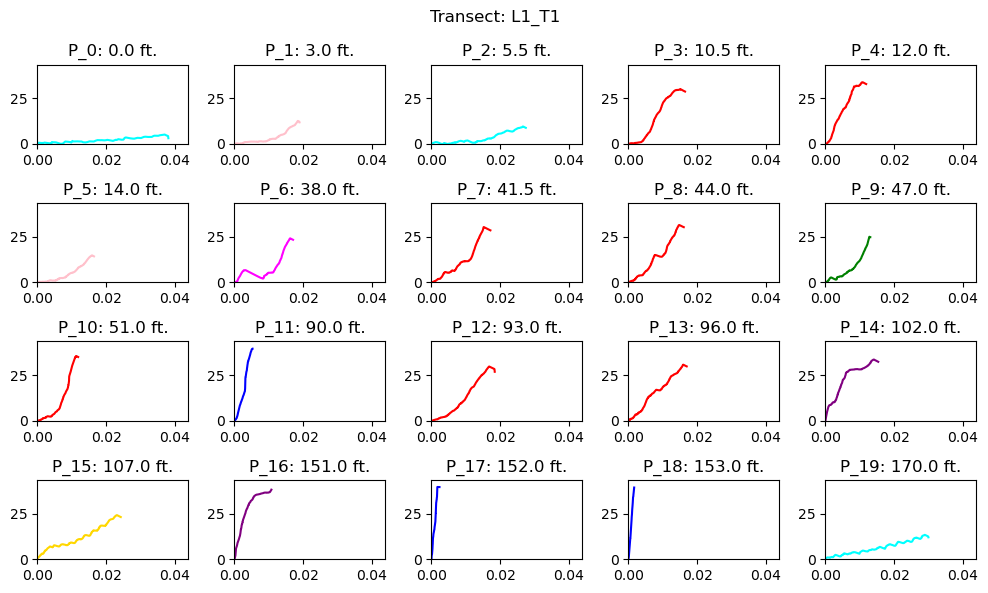

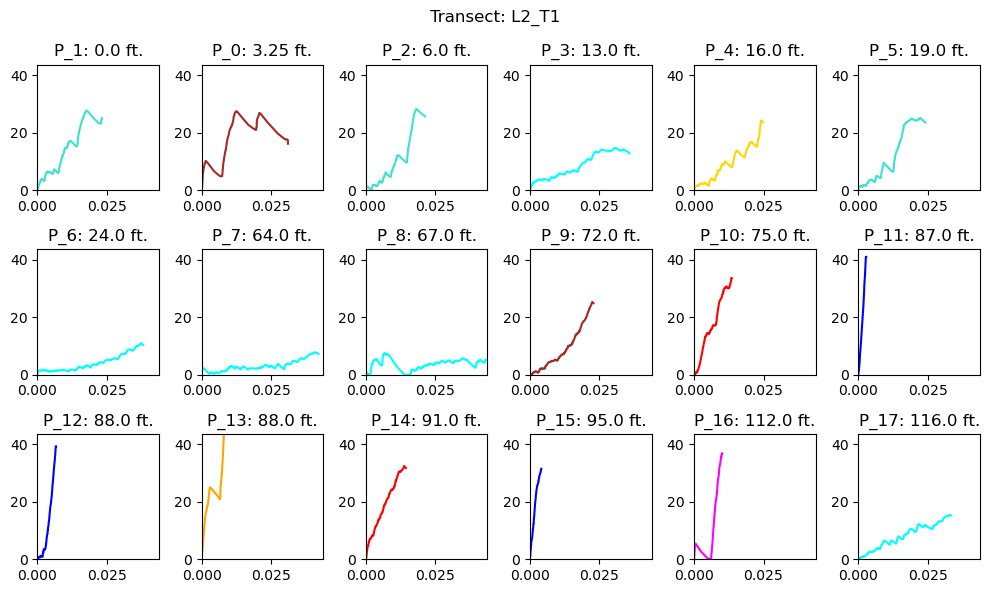

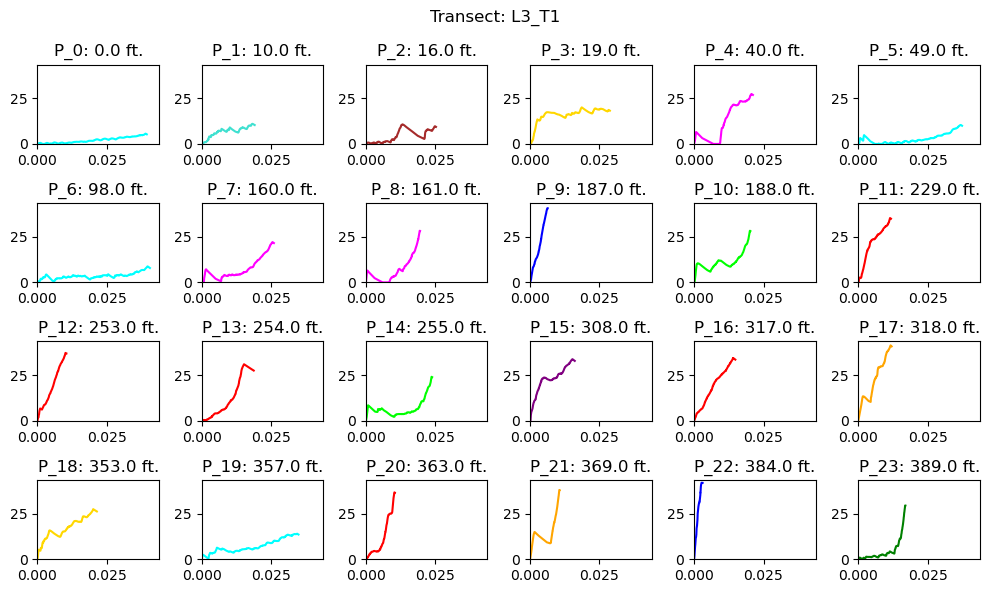

In [70]:
plot_transect_subplots(depth_resist_curve_df_list, transect_dict, filename_to_depth_resist)